In [1]:
import pandas
import numpy
import spacy
%matplotlib inline

In [2]:
reviewsdf = pandas.read_csv('deceptive-opinion.csv')

In [5]:
reviewsdf.head(5)

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [6]:
reviewsdf.tail(5)

,deceptive,hotel,polarity,source,text
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama..."


In [4]:
reviewsdf.pivot_table(
    columns=['deceptive','polarity'],
    values=['deceptive','polarity'],
    index = ['hotel'],
    aggfunc = len).fillna(0)

source                                 text           \
deceptive        deceptive          truthful          deceptive            
polarity          negative positive negative positive  negative positive   
hotel                                                                      
affinia                 20       20       20       20        20       20   
allegro                 20       20       20       20        20       20   
amalfi                  20       20       20       20        20       20   
ambassador              20       20       20       20        20       20   
conrad                  20       20       20       20        20       20   
fairmont                20       20       20       20        20       20   
hardrock                20       20       20       20        20       20   
hilton                  20       20       20       20        20       20   
homewood                20       20       20       20        20       20   
hyatt                   20       20       20       20        20       20   
intercontinental        20       20       20       20        20       20   
james                   20       20       20       20        20       20   
knickerbocker           20       20       20       20        20       20   
monaco                  20       20       20       20        20       20   
omni                    20       20       20       20        20       20   
palmer                  20       20       20       20        20       20   
sheraton                20       20       20       20        20       20   
sofitel                 20       20       20       20        20       20   
swissotel               20       20       20       20        20       20   
talbott                 20       20       20       20        20       20   

                                    
deceptive        truthful           
polarity         negative positive  
hotel                               
affinia                20       20  
allegro                20       20  
amalfi                 20       20  
ambassador             20       20  
conrad                 20       20  
fairmont               20       20  
hardrock               20       20  
hilton                 20       20  
homewood               20       20  
hyatt                  20       20  
intercontinental       20       20  
james                  20       20  
knickerbocker          20       20  
monaco                 20       20  
omni                   20       20  
palmer                 20       20  
sheraton               20       20  
sofitel                20       20  
swissotel              20       20  
talbott                20       20

Visualizations

In [7]:
#Mean Length Functon
def mean_len(group, mean = True):
    if mean == True:
        return numpy.mean(group.text.str.len())
    else:
        return group.text.str.len()

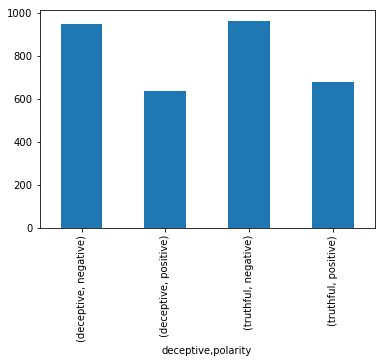

In [12]:
plotvar = reviewsdf.groupby(
    ['deceptive','polarity']).apply(
    mean_len, mean = True).plot('bar')

In [15]:
from scipy.stats import ttest_ind
pandas.set_option('display.float_format',lambda x: '%2f' %x)
test1= ttest_ind(
    reviewsdf[reviewsdf.polarity=='positive'].text.str.len(),
    reviewsdf[reviewsdf.polarity=='negative'].text.str.len())

test2= ttest_ind(
    reviewsdf[reviewsdf.source=='TripAdvisor'].text.str.len(),
    reviewsdf[reviewsdf.source!='TripAdvisor'].text.str.len())

test3= ttest_ind(
    reviewsdf[reviewsdf.deceptive=='deceptive'].text.str.len(),
    reviewsdf[reviewsdf.deceptive=='truthful'].text.str.len())

test1, test2, test3

(Ttest_indResult(statistic=-13.519240422712002, pvalue=1.6379745425467699e-39),
 Ttest_indResult(statistic=-6.4292502567428444, pvalue=1.6889597062657227e-10),
 Ttest_indResult(statistic=-1.2660429409833915, pvalue=0.20568224165031751))

make a copy of the df for nlp 

In [16]:
nlpcopy=reviewsdf.copy()
nlpcopy.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


Stopwords

In [21]:
import nltk

In [22]:
from nltk.corpus import stopwords
import re
#stopwds=set(stopwords.words('english'))

Used nltk.download() to download the stopwords corpus
#nltk.download()

In [33]:
stopwds=set(stopwords.words('english'))

In [27]:
import en_core_web_md

https://stackoverflow.com/questions/43071775/spacy-how-to-get-the-spacy-model-name
Note that models are not downloaded automatically when you install spaCy, so you have to download them separately (see the docs for a list of available models):

python -m spacy download en              # default English model (~50MB)
python -m spacy download en_core_web_md  # larger English model (~1GB)
c:\users\karen\Anaconda3\Lib\site-packages

In [28]:
nlp=en_core_web_md.load()

In [30]:
parsed = nlp.pipe(iter(nlpcopy['text']),batch_size=1,n_threads=4)

In [34]:
parsed = nlp.pipe(iter(nlpcopy['text']),batch_size=1,n_threads=4)

tokens,lemma,parts,stopword=[],[],[],[]

for parsed_review in parsed:
    tokens.append([n.text for n in parsed_review])
    lemma.append([n.lemma_ for n in parsed_review])
    parts.append([n.pos_ for n in parsed_review])
    stopword.append([n.is_stop for n in parsed_review])
nlpcopy['tokens'] = tokens 
nlpcopy['tokens_stopwords'] = nlpcopy['tokens'].apply(lambda x: [item for item in x if item not in stopwds])
nlpcopy['lemma'] = lemma
nlpcopy['pos'] = parts
nlpcopy['stopword'] = stopword
nlpcopy.head(4).append(nlpcopy.tail(4))

ValueError: Length of values does not match length of index

In [ ]:
numpron=[]
numnouns=[]
numpunct=[]
numverbs=[]

for row in nlpcopy.